


# 크롤링 종류
## static vs dynamic
|  방식  |라이브러리|  특징  |
|------|------|------|
| static |   bs4   |빠르다, url 이동이 번거롭다|
| dynamic |selenium|쉽다|


[강의 링크](https://youtu.be/Al-S0DQsVsk?si=mPea1LMqxahK6YGt)


## 사용 라이브러리
- selenium, urllib, ChromeDriveManager, time

## 연습 사이트
https://www.google.co.kr/imghp

## STEP 01
1. F12 개발자 도구 > Select an element in the page to inspect it (Ctrl + Shift + C)
2. UI화면: 검색창 선택 (textarea)
3. 개발자도구: <textarea class=.....> 우클릭 > Copy > Copy XPath

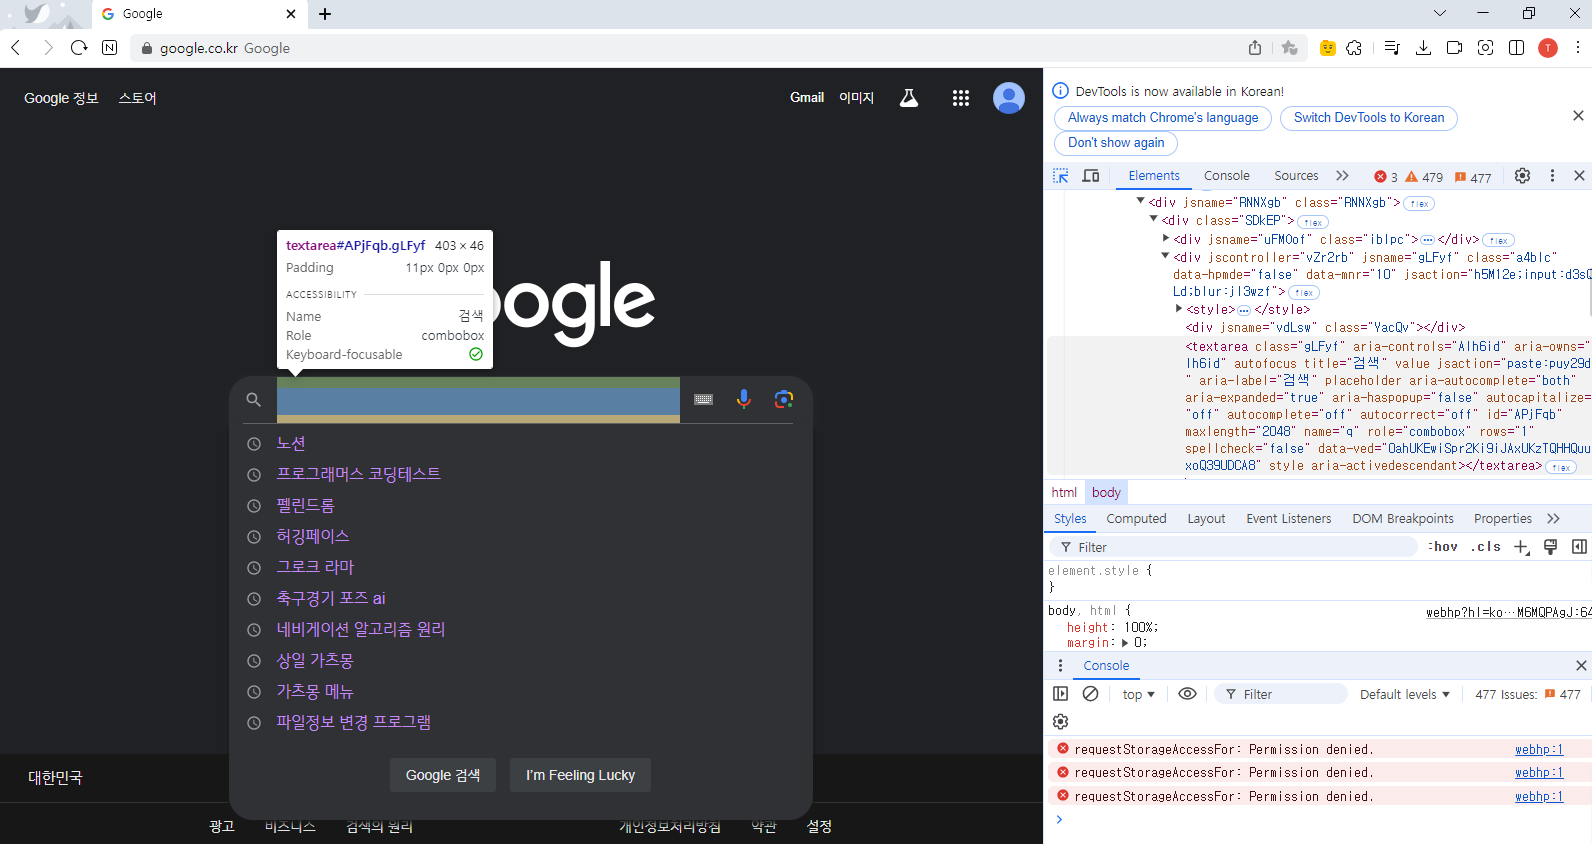

In [ ]:
# 구글 검색창 선택하는 법
    # 기본 XPath
    # XPath = //*[@id="APjFqb"]
        # 업데이트되면 id값이 바뀔 수 있음
    
    # NAME으로 찾기
    # keyElement = driver.find_element(By.NAME, "q")

## STEP 02
1. 찾을 이미지 검색 > 긁어올 사진 썸네일 선택
2. F12 개발자 도구 > Select an element in the page to inspect it (Ctrl + Shift + C)
3. <img id=.....> 우클릭 > Copy > Copy Selector

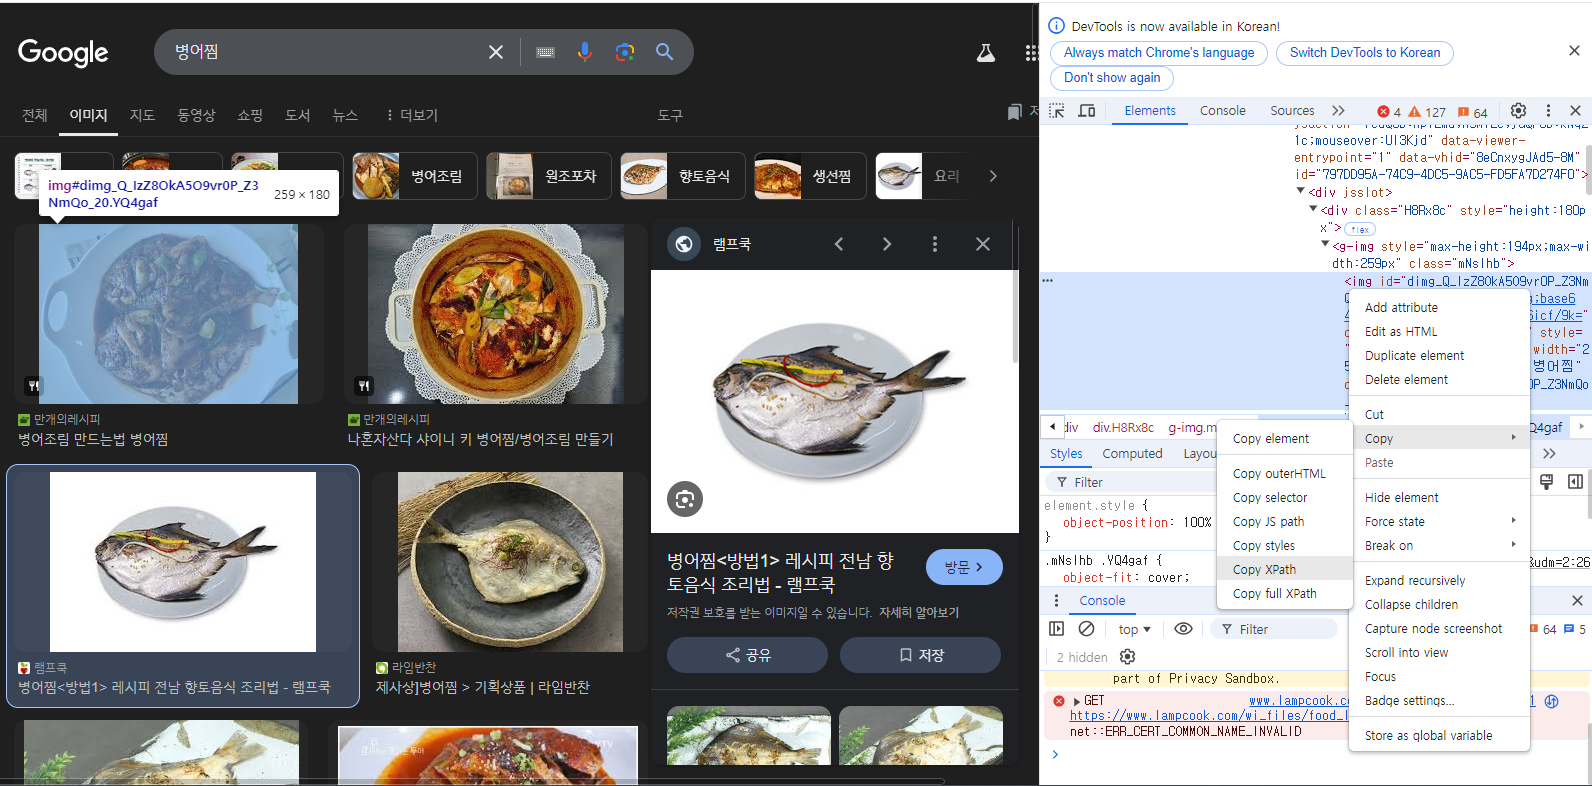

In [1]:
imgXPATH = '//*[@id="dimg_9wk0Z_KgO6zX1e8PxuuV6QU_25"]'

In [2]:
from selenium.webdriver.common.keys import Keys             # key값 return
from webdriver_manager.chrome import ChromeDriverManager    # 브라우저 호환때문에
from selenium.webdriver.common.by import By                 # 긁어올 때 By 하나로 제어
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
import urllib.request
import time

chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = chrome_options)

URL = 'https://www.google.co.kr/imghp'
driver.get(url=URL)
driver.implicitly_wait(time_to_wait=5)
keyElement = driver.find_element(By.XPATH, '//*[@id="APjFqb"]')
keyElement.send_keys('병어찜')
keyElement.send_keys(Keys.RETURN)


wait = WebDriverWait(driver, 10)  # 최대 10초 대기
img_element = wait.until(EC.presence_of_element_located((By.XPATH, imgXPATH)))
url = img_element.get_attribute("src")
# print(url)
urllib.request.urlretrieve(url, "C:/Github/07_streamlit/Crwaling/img/GoogleImg_silver.jpg")

TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00BE5093+25075]
	(No symbol) [0x00B6E124]
	(No symbol) [0x00A4BE63]
	(No symbol) [0x00A8FD06]
	(No symbol) [0x00A8FF4B]
	(No symbol) [0x00ACD8C2]
	(No symbol) [0x00AB1EC4]
	(No symbol) [0x00ACB48E]
	(No symbol) [0x00AB1C16]
	(No symbol) [0x00A83F3C]
	(No symbol) [0x00A84ECD]
	GetHandleVerifier [0x00ED2523+3094147]
	GetHandleVerifier [0x00EE5754+3172532]
	GetHandleVerifier [0x00EDDF32+3141778]
	GetHandleVerifier [0x00C82100+668256]
	(No symbol) [0x00B76C4D]
	(No symbol) [0x00B73DF8]
	(No symbol) [0x00B73F95]
	(No symbol) [0x00B66C80]
	BaseThreadInitThunk [0x75B27BA9+25]
	RtlInitializeExceptionChain [0x77D4C0CB+107]
	RtlClearBits [0x77D4C04F+191]


In [ ]:
# 레퍼런스 기본 코드(안 됨)

url = driver.find_element(By.CSS_SELECTOR, '//*[@id="dimg_9wk0Z_KgO6zX1e8PxuuV6QU_25"]').get_attribute("src")
# print(url)
urllib.request.urlretrieve(url, "C:/Github/07_streamlit/Crwaling/img/GoogleImg_silver.jpg")

In [ ]:
from selenium import webdriver                              # 동적 사이트 수집
from selenium.webdriver.common.keys import Keys             # key값 입력
from webdriver_manager.chrome import ChromeDriverManager    # 크롬 드라이버 설치
from selenium.webdriver.chrome.service import Service       # 크롬 드라이버 서비스
from selenium.webdriver.common.by import By                 # find_element 함수 쉽게 사용
import urllib.request                                       # url 기반으로 img 저장
import time
import os                                                   # 이미지 저장 폴더 생성

chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()), options = chrome_options)


# 홈페이지 접속 (구글_이미지)
URL = 'https://www.google.co.kr/imghp'
driver.get(url=URL)
# imgSelector = ''
# imgXPATH = ''

# 구글 검색창 찾기
keyElement = driver.find_element(By.NAME, "q")
keyElement.send_keys('병어찜')
keyElement.send_keys(Keys.RETURN)

# 대기시간 주기
driver.implicitly_wait(5)

# 이미지 불러오기
    # 썸네일 순회 0, 2, 4 .... 
print("1-------------------------------------------------------------------")
url = driver.find_elements(By.CSS_SELECTOR, '.GyAeWb .YQ4gaf')[4].click()
driver.implicitly_wait(5)
url2 = driver.find_elements(By.CSS_SELECTOR, '.sFlh5c.FyHeAf')[0].get_attribute("src")

# url = driver.find_elements(By.CSS_SELECTOR, '.GyAeWb .YQ4gaf')[0].get_attribute("src")
print("2=====-------------------------------------------------------------------")
#print(url2)
print("3=====-------------------------------------------------------------------")

urllib.request.urlretrieve(url2, "test.jpg")

#driver.find_elements(By.XPATH, imgXPATH).click()

# img_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, imgSelector)))
# url = img_element.get_attribute("src")
# # print(url)

Exception ignored in: <function Service.__del__ at 0x0000025334482170>
Traceback (most recent call last):
  File "c:\miniconda\envs\streamlit\lib\site-packages\selenium\webdriver\common\service.py", line 195, in __del__
    self.stop()
  File "c:\miniconda\envs\streamlit\lib\site-packages\selenium\webdriver\common\service.py", line 152, in stop
    self.send_remote_shutdown_command()
  File "c:\miniconda\envs\streamlit\lib\site-packages\selenium\webdriver\common\service.py", line 137, in send_remote_shutdown_command
    if not self.is_connectable():
  File "c:\miniconda\envs\streamlit\lib\site-packages\selenium\webdriver\common\service.py", line 126, in is_connectable
    return utils.is_connectable(self.port)
  File "c:\miniconda\envs\streamlit\lib\site-packages\selenium\webdriver\common\utils.py", line 101, in is_connectable
    socket_ = socket.create_connection((host, port), 1)
  File "c:\miniconda\envs\streamlit\lib\socket.py", line 845, in create_connection
    sock.connect(sa)
K

1-------------------------------------------------------------------
2=====-------------------------------------------------------------------
3=====-------------------------------------------------------------------


('test.jpg', <http.client.HTTPMessage at 0x253369251b0>)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaCO6MBxE9A42ojWDSoMxSXtXgVKOUuN2E0g&amp;s" class="sFlh5c FyHeAf" alt="나혼자산다 샤이니 키 병어찜/병어조림 만들기" jsname="JuXqh" style="max-width: 1500px; width: 286px; height: 220px; margin: 0px; position: absolute; visibility: hidden;" data-ilt="1731495278235">